### kNN Project
#### Using abalone data to train a ML to detect the abalone's age based on its dimensions

##### Vedant Vohra, kNN, 5/18/23

In [19]:
import pandas as pd
import numpy as np

In [20]:
abalone = pd.read_csv('abalone.data', header = None)

In [21]:
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera Weight', 'Shell weight', 'Rings']
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera Weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [22]:
abalone = abalone.drop('Sex', axis=1)
abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera Weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<AxesSubplot:>

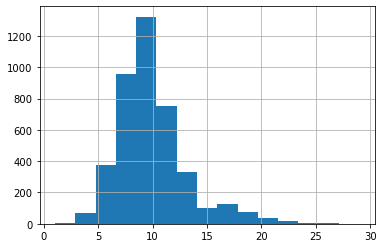

In [23]:
import matplotlib.pyplot as plt
abalone['Rings'].hist(bins=15)

In [24]:
#Correlation matrix

corr_matrix = abalone.corr()
corr_matrix['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera Weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [25]:
X = abalone.drop('Rings', axis = 1)
X = X.values
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [26]:
Y = abalone['Rings']
Y = Y.values
Y

array([15,  7,  9, ...,  9, 10, 12])

In [27]:
# Create a test data point and calculate distances

new_data_point = np.array([0.569552, 0.446407,0.154437,1.016849,0.439051,0.222526,0.291208])

distances= np.linalg.norm(X-new_data_point, axis = 1)
len(distances)

4177

In [28]:
# Identify nearest k neighbors to test point

k=6
nearest_neighbor_index = distances.argsort()[:k]
nearest_neighbor_index

array([4045, 1902, 1644, 1132, 1894, 3915])

In [29]:
# Using indices above to find their age
nearest_neighbor_rings = Y[nearest_neighbor_index]

nearest_neighbor_rings

array([ 9, 11, 10,  9, 11, 11])

In [30]:
# Average number of rings to get a prediction

prediction = nearest_neighbor_rings.mean()
prediction

10.166666666666666

In [31]:
# implement using packages
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12345)

In [32]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [33]:
knn_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [34]:
train_predict = knn_model.predict(X_train)

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(Y_train,train_predict)
rmse = sqrt(mse)
rmse

1.653705966446084

In [36]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(Y_test,test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521